In [ ]:
# import libraries
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications import densenet
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.metrics import confusion_matrix, classification_report

import numpy as np

In [ ]:
# use transfer learning with DenseNet169
base_model = densenet.DenseNet169(weights = "imagenet", include_top = False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)

preds = Dense(2, activation = "sigmoid")(x)

model = Model(inputs = base_model.input, outputs = preds) 

In [ ]:
# declare batch size
BATCH_SIZE = 16

In [ ]:
# declare ImageDataGenerator objects
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   brightness_range = [0.2, 1.0],
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# create generators 
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/Project COVID-CT/Output/train",
                                                    target_size = (480, 480),
                                                    color_mode = "rgb",
                                                    batch_size = BATCH_SIZE,
                                                    class_mode = "categorical",
                                                    shuffle = True)

Found 521 images belonging to 2 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/Project COVID-CT/Output/val",
                                                    target_size = (480, 480),
                                                    color_mode = "rgb",
                                                    batch_size = BATCH_SIZE,
                                                    class_mode = "categorical",
                                                    shuffle = True)

Found 111 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/Project COVID-CT/Output/test",
                                                  shuffle = False)

Found 114 images belonging to 2 classes.


In [ ]:
# declare callbacks for our model training
es = EarlyStopping(monitor = "val_loss", patience = 3)
mc = ModelCheckpoint("/content/drive/MyDrive/Project COVID-CT/best_model.h5",
                     save_best_only = True)

In [ ]:
# compile model for training 
model.compile(optimizer = Adam(learning_rate = 0.0001),
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [ ]:
# train our model
history = model.fit(train_generator,
                    steps_per_epoch = train_generator.samples // BATCH_SIZE,
                    validation_data = val_generator,
                    validation_steps = val_generator.samples // BATCH_SIZE,
                    epochs = 50,
                    callbacks = [es, mc])

Epoch 1/50
32/32 [==============================] - 128s 2s/step - loss: 0.6494 - accuracy: 0.6791 - val_loss: 0.5791 - val_accuracy: 0.7292
Epoch 2/50
32/32 [==============================] - 47s 1s/step - loss: 0.3814 - accuracy: 0.8179 - val_loss: 0.5664 - val_accuracy: 0.6875
Epoch 3/50
32/32 [==============================] - 46s 1s/step - loss: 0.3533 - accuracy: 0.8634 - val_loss: 0.3870 - val_accuracy: 0.8229
Epoch 4/50
32/32 [==============================] - 46s 1s/step - loss: 0.2665 - accuracy: 0.8893 - val_loss: 0.4281 - val_accuracy: 0.8333
Epoch 5/50
32/32 [==============================] - 46s 1s/step - loss: 0.1961 - accuracy: 0.9423 - val_loss: 0.5190 - val_accuracy: 0.7812
Epoch 6/50
32/32 [==============================] - 46s 1s/step - loss: 0.1809 - accuracy: 0.9152 - val_loss: 0.2788 - val_accuracy: 0.8958
Epoch 7/50
32/32 [==============================] - 46s 1s/step - loss: 0.1358 - accuracy: 0.9293 - val_loss: 0.4932 - val_accuracy: 0.7812
Epoch 8/50
32/32 [=

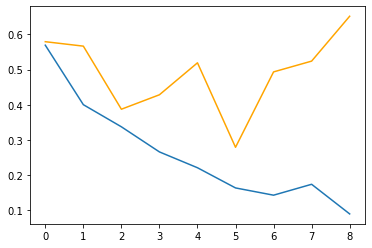

In [ ]:
plt.plot(history.epoch, history.history["loss"])
plt.plot(history.epoch, history.history["val_loss"], color = "orange")

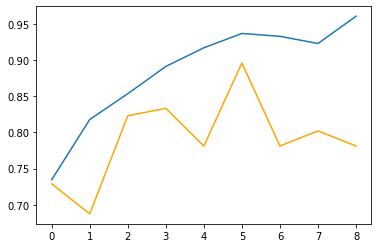

In [ ]:
plt.plot(history.epoch, history.history["accuracy"])
plt.plot(history.epoch, history.history["val_accuracy"], color = "orange")

In [ ]:
# look at test_generator classes
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

In [ ]:
# make predictions using test data
predictions = model.predict(test_generator)
predictions

array([[2.3529518e-08, 1.0000000e+00],
       [2.0418581e-06, 9.9999714e-01],
       [1.4289875e-04, 9.9995267e-01],
       [2.1927939e-01, 9.0776742e-01],
       [2.0717334e-08, 1.0000000e+00],
       [9.9632720e-09, 1.0000000e+00],
       [1.0539643e-03, 9.9865013e-01],
       [2.2461554e-05, 9.9998927e-01],
       [2.9571657e-07, 9.9999928e-01],
       [3.3582747e-08, 1.0000000e+00],
       [1.7257985e-09, 1.0000000e+00],
       [4.6472796e-03, 9.9675709e-01],
       [3.9560044e-05, 9.9994147e-01],
       [9.7317569e-02, 8.8329238e-01],
       [9.7619212e-01, 1.4848666e-02],
       [2.7880206e-04, 9.9982458e-01],
       [2.6063795e-05, 9.9999630e-01],
       [1.8487121e-03, 9.9971193e-01],
       [3.0960588e-04, 9.9988604e-01],
       [2.6621130e-06, 9.9999928e-01],
       [1.6202883e-09, 1.0000000e+00],
       [2.2627434e-03, 9.9478781e-01],
       [8.6021900e-01, 3.1127104e-01],
       [1.2858672e-04, 9.9970335e-01],
       [3.5334576e-04, 9.9950123e-01],
       [2.4702374e-06, 9.

In [ ]:
# use numpy to get predicted classes out 
single_pred = np.argmax(predictions, axis = 1)
single_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [ ]:
confusion_matrix(test_generator.classes, single_pred)

array([[ 3, 50],
       [ 0, 61]])

In [ ]:
              # Predictions
#                0        1
# Actual  0     TN       FP
#         1     FN       TP

Our model is good at predicting True Positives but horrible at detecting True Negatives. In fact, it has a significant number of wrong guesses in the False Positives category. 

In the case of COVID, it is, clinically speaking, more important that we avoid False Negatives. On the other hand, if our model predicts False Positives, the only downside is that the individual with the lung CT scans may have to undergo more tests. Therefore, in this case, we would prioritize the reduction of False Negatives over reduction of False Positives. 

In [ ]:
print(classification_report(test_generator.classes, single_pred))

              precision    recall  f1-score   support

           0       1.00      0.06      0.11        53
           1       0.55      1.00      0.71        61

    accuracy                           0.56       114
   macro avg       0.77      0.53      0.41       114
weighted avg       0.76      0.56      0.43       114



In [ ]:
from keras.models import load_model
saved_model = load_model("/content/drive/MyDrive/Project COVID-CT/best_model.h5")
saved_model

In [ ]:
saved_model_predictions = saved_model.predict(test_generator)

In [ ]:
saved_single_pred = np.argmax(saved_model_predictions, axis = 1)
saved_single_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [ ]:
confusion_matrix(test_generator.classes, saved_single_pred)

array([[27, 26],
       [ 1, 60]])

In [ ]:
print(classification_report(test_generator.classes, saved_single_pred))

              precision    recall  f1-score   support

           0       0.96      0.51      0.67        53
           1       0.70      0.98      0.82        61

    accuracy                           0.76       114
   macro avg       0.83      0.75      0.74       114
weighted avg       0.82      0.76      0.75       114



We can see that the model saved in our best_model folder performed better than the latest model. Unsurprising!

# Recap:
## Part 1
1. Collected research data from researchers
2. Splitted the data into train, validation and test sets

## Part 2
1. Replicated <em>some</em> of the authors' methods and experimental setting
2. Completed one round of model training 
3. Acessed model performance  
